In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import holidays

In [ ]:
def read():
        file_id = "1c222AbSUMn9vKcepLZDnyCKUN2B8BQtP"
        url = f"https://drive.google.com/uc?export=download&id={file_id}"
        df = pd.read_csv(url, sep=',', low_memory=False)
        return df

In [130]:
print("===Dataset Overview===")
def print_overview(df):
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("Columns:")
    for col in df.columns:
        print(f"- {col}")
    print("\nFirst 5 rows:")
    print(df.head())

if __name__ == "__main__":
    df = read()
    print_overview(df)
    print("\n===End of Overview===")

===Dataset Overview===
Number of rows: 1441
Number of columns: 11
Columns:
- datetime
- Global_active_power
- Global_reactive_power
- Voltage
- Global_intensity
- Sub_metering_1
- Sub_metering_2
- Sub_metering_3
- temp
- humidity
- conditions

First 5 rows:
     datetime  Global_active_power  Global_reactive_power  Voltage  \
0  2006-12-17                1.044                  0.152   242.73   
1  2006-12-18                0.278                  0.126   246.17   
2  2006-12-19                0.414                  0.242   241.19   
3  2006-12-20                0.824                  0.058   245.57   
4  2006-12-21                1.814                  0.148   243.51   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  temp  \
0               4.4             0.0             2.0             0.0  3.94   
1               1.2             0.0             2.0             0.0  4.39   
2               2.0             0.0             1.0             0.0  2.44   
3            

''This dataset provides 1441 rows and 11 columns, containing information related to electricity consumption and environmental conditions over time.

Energy Metrics: Includes Global_active_power, Global_reactive_power, Voltage, and Global_intensity—useful for analyzing energy trends.

Sub Metering Data: Three sub-metering columns measure energy use in different locations.

Weather Influence: Temperature, humidity, and weather conditions provide context on how environmental factors may impact energy usage.

Date Range: Starts from December 17, 2006, showing daily energy data alongside weather conditions.

The first few rows suggest variability in power consumption and environmental factors. For example, the humidity levels fluctuate between 72.3% and 91.1%, while temperature remains low.''

In [ ]:
# Check statistics, missing values, and data types
print("\n===Data Types and Missing Values===")
df_dtypes_missing = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum()
}).reset_index().rename(columns={'index': 'Column'})
print(df_dtypes_missing) 
print("\n===Descriptive Statistics===") 
df.describe()


===Data Types and Missing Values===
                   Column Data Type  Missing Values
0                datetime    object               0
1     Global_active_power   float64              15
2   Global_reactive_power   float64              15
3                 Voltage   float64              15
4        Global_intensity   float64              15
5          Sub_metering_1   float64              15
6          Sub_metering_2   float64              15
7          Sub_metering_3   float64              15
8                    temp   float64               0
9                humidity   float64               0
10             conditions    object               0

===Descriptive Statistics===


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,temp,humidity
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1441.000000,1441.000000
mean,0.747679,0.116410,242.672195,3.162973,0.532258,0.697055,3.308555,12.188494,72.586676
std,0.795084,0.100699,2.770333,3.292621,4.249666,3.454682,6.499891,6.437531,11.663047
min,0.080000,0.000000,229.400000,0.200000,0.000000,0.000000,0.000000,-4.720000,35.100000
25%,0.290000,0.048000,241.232500,1.200000,0.000000,0.000000,0.000000,7.560000,64.600000
50%,0.398000,0.100000,242.880000,1.800000,0.000000,0.000000,0.000000,12.440000,73.700000
75%,0.956500,0.186000,244.370000,4.000000,0.000000,1.000000,1.000000,17.500000,81.400000
max,5.806000,0.588000,251.710000,24.400000,40.000000,74.000000,20.000000,27.220000,97.100000


In [86]:
df=df.fillna(method='ffill')  # Forward fill to handle missing values


C:\Users\bhusa\AppData\Local\Temp\ipykernel_18856\3664906666.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [87]:
df['datetime']= pd.to_datetime(df['datetime'], errors='coerce')  # Convert 'datetime' column to datetime type
df.set_index('datetime', inplace=True)  # Set 'datetime' as index


In [88]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
temp                     0
humidity                 0
conditions               0
dtype: int64

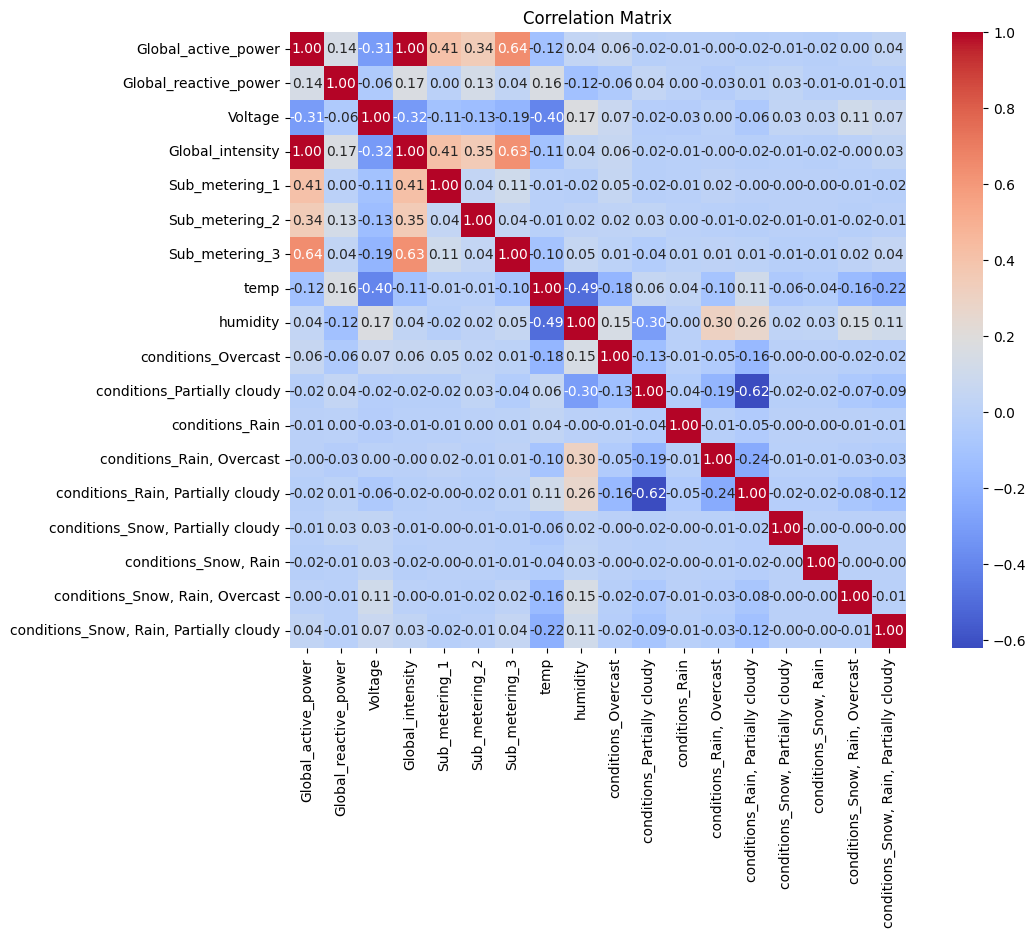

In [89]:
df = pd.get_dummies(df, columns=['conditions'], drop_first=True) # Convert categorical 'conditions' column to dummy variables
# Plotting the time series correlation of various features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

A few key observations:

Global_active_power is positively correlated with Global_intensity and Sub_metering_3, meaning higher power usage tends to be associated with higher intensity and sub-metering.

Temperature has a negative correlation with humidity, suggesting that as temperature increases, humidity tends to decrease.

Weather conditions generally show low correlations with other variables, implying they might have a minimal direct impact on power usage or intensity.

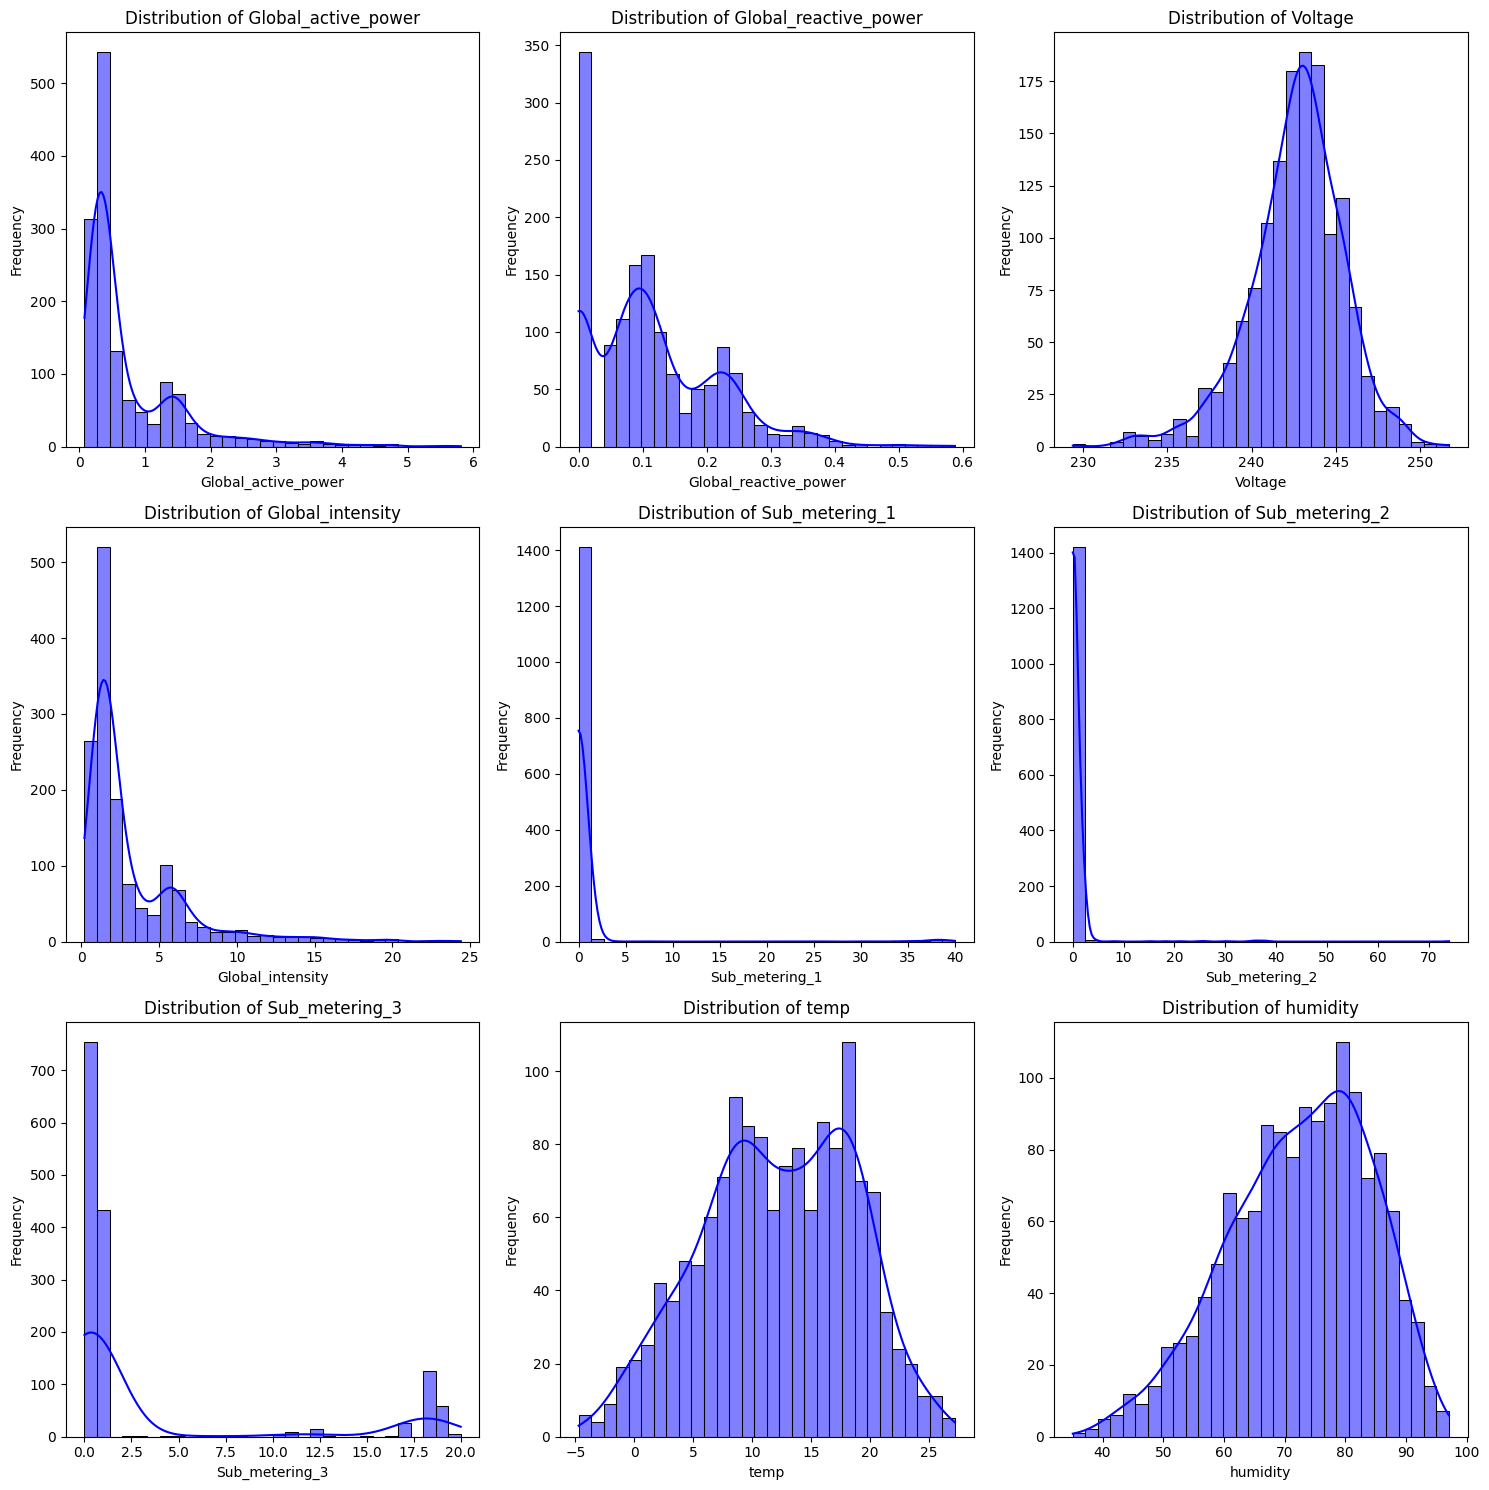

In [90]:
#Plot the distribution of the all variables(each row 3 distribution)
def plot_variable_distributions(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    num_vars = len(numeric_columns)
    num_cols = 3
    num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, column in enumerate(numeric_columns):
        sns.histplot(df[column], kde=True, bins=30, ax=axes[i], color='blue', edgecolor='black')
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_variable_distributions(df)


- Global_active_power and Global_reactive_power are highly skewed, with most values near zero. This suggests that energy consumption spikes only occasionally.
- Global_intensity follows a similar pattern, reinforcing the idea of low baseline usage with occasional peaks.
- Voltage: Displays a near-normal distribution centered around 240V. This suggests stable electrical conditions with minimal fluctuations.
- Sub-metering Data: Sub_metering_1, 2, and 3 are mostly clustered near zero, indicating that certain appliances or sectors consume minimal energy most of the time but have periodic high usage.
-Environmental Factors:Temperature appears bimodal, hinting at seasonal differences in recorded data. Humidity follows a normal-like distribution,  readings are concentrated around 60%-90%.


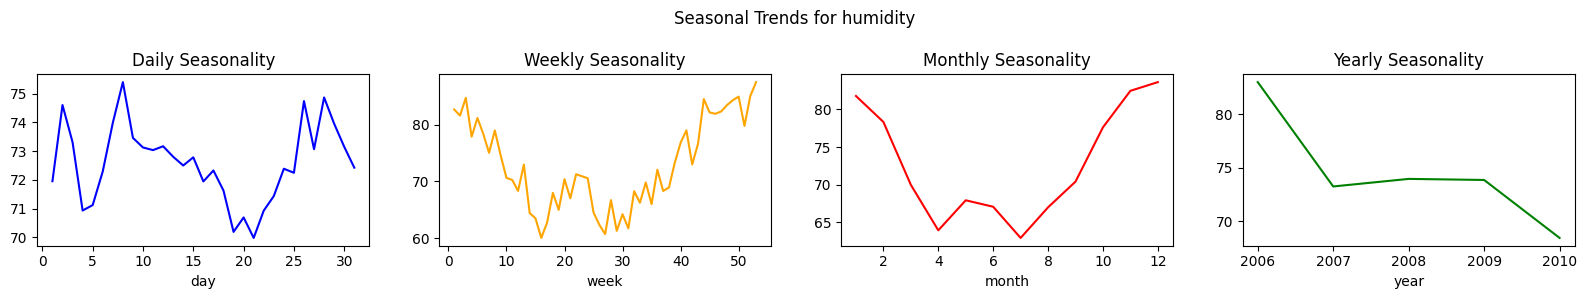

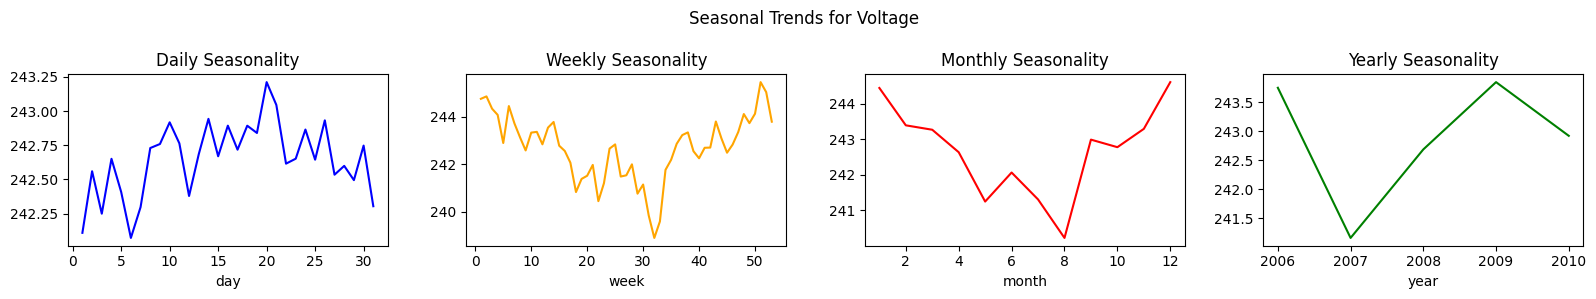

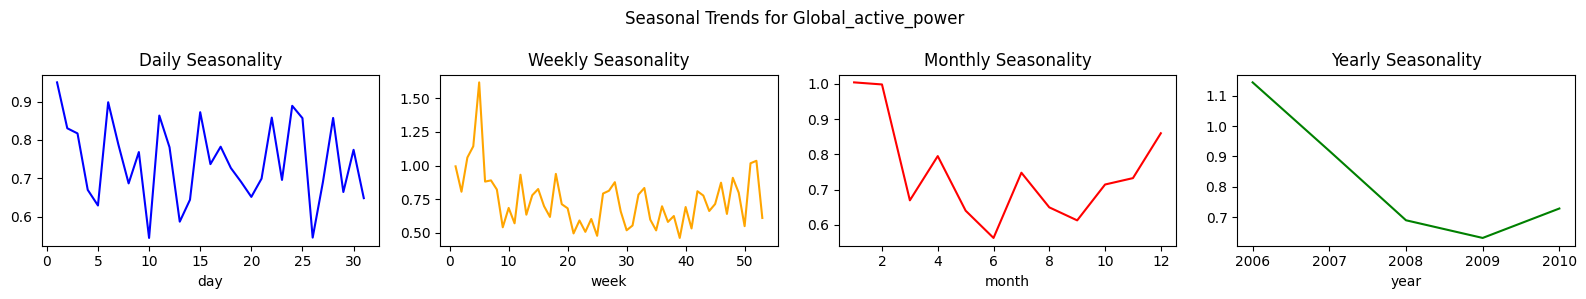

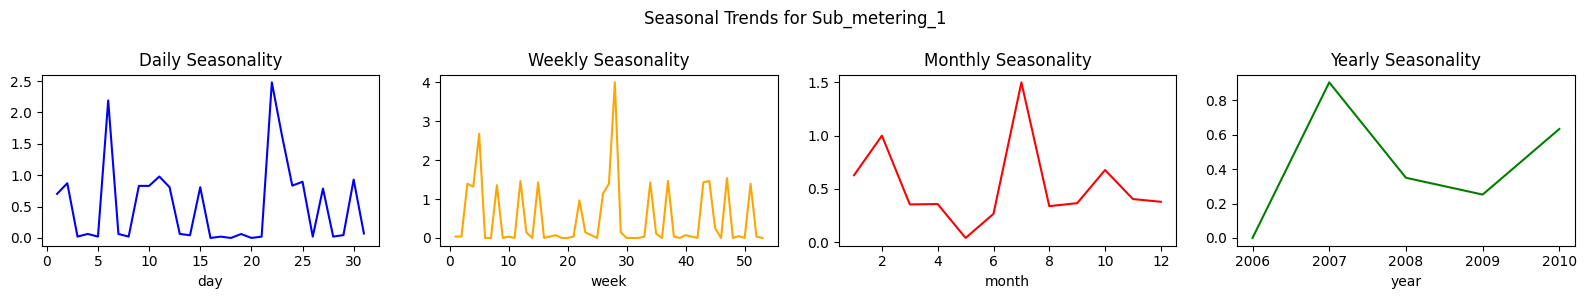

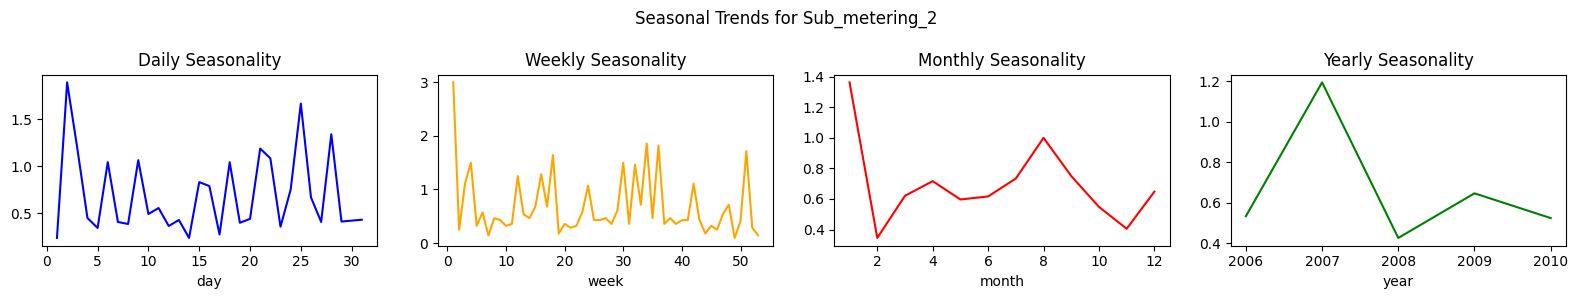

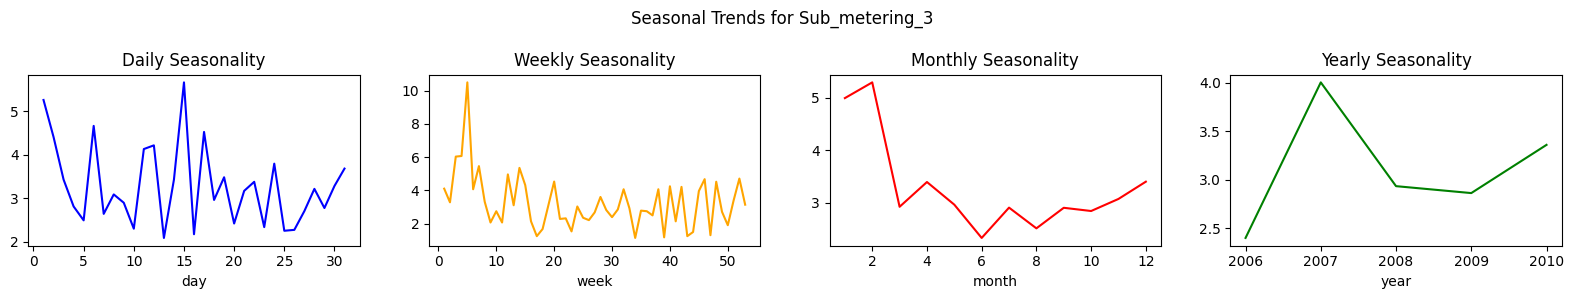

In [92]:
# Seasonality Checks(Daily,Weekly, Monthly,Yearly) and plot all three seasonal trends for each variable in a row
def plot_seasonal_trends(df, column):    
    df['day'] = df.index.day
    df['week'] = df.index.isocalendar().week
    df['month'] = df.index.month
    df['year'] = df.index.year
    daily_seasonality = df.groupby('day')[column].mean()
    weekly_seasonality = df.groupby('week')[column].mean()
    monthly_seasonality = df.groupby('month')[column].mean()
    yearly_seasonality = df.groupby('year')[column].mean()  # Fix: remove extra .mean()

    fig, axs = plt.subplots(1, 4, figsize=(16, 3))
    daily_seasonality.plot(ax=axs[0], title='Daily Seasonality', color='blue')
    weekly_seasonality.plot(ax=axs[1], title='Weekly Seasonality', color='orange')
    monthly_seasonality.plot(ax=axs[2], title='Monthly Seasonality', color='red')
    yearly_seasonality.plot(ax=axs[3], title='Yearly Seasonality', color='green')
    fig.suptitle(f'Seasonal Trends for {column}')

    plt.tight_layout()
    plt.show()

plot_seasonal_trends(df, 'humidity')
plot_seasonal_trends(df, 'Voltage')
plot_seasonal_trends(df, 'Global_active_power')
plot_seasonal_trends(df, 'Sub_metering_1')
plot_seasonal_trends(df, 'Sub_metering_2')
plot_seasonal_trends(df, 'Sub_metering_3')

In [94]:
# Environmental factors over time (Temperature and Humidity) using plotly
import plotly.express as px

def plot_environmental_factors(df):
    fig = px.line(df, x=df.index, y=['temp', 'humidity'], labels={'value': 'Measurement', 'variable': 'Environmental Factor'})
    fig.update_traces(line=dict(width=2))
    fig.update_layout(title='Environmental Factors Over Time', xaxis_title='Time', yaxis_title='Measurement')
    fig.show()
    plt.tight_layout()
    
plot_environmental_factors(df)

<Figure size 640x480 with 0 Axes>

- Temperature (red line) fluctuates between 60 and 100, showing an overall pattern of seasonal variation.
- Humidity (blue line) moves in the opposite direction to temperature—when temperature increases, humidity decreases, and vice versa. This inverse relationship makes sense, as warmer air holds more moisture, reducing relative humidity, while cooler temperatures lead to higher humidity.


In [95]:
# Add time-based features
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_week'] = df.index.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                         'Spring' if x in [3, 4, 5] else
                                         'Summer' if x in [6, 7, 8] else 'Fall')

In [96]:
# Calculate total consumption
df['total_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['other_consumption'] = df['Global_active_power']*1000/60 - df['total_metering']

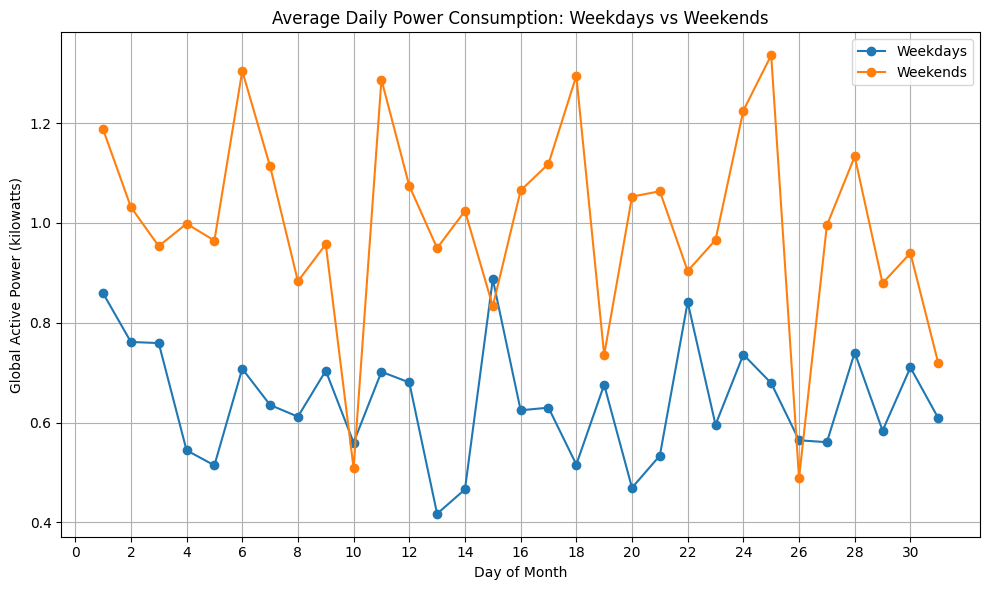

In [101]:

# 1. Analyze weekday vs weekend patterns
weekday_data = df[df['is_weekend'] == 0]
weekend_data = df[df['is_weekend'] == 1]

# daily patterns by weekday/weekend
plt.figure(figsize=(10, 6))
weekday_pattern = weekday_data.groupby('day')['Global_active_power'].mean()
weekend_pattern = weekend_data.groupby('day')['Global_active_power'].mean()

plt.plot(weekday_pattern.index, weekday_pattern.values, marker='o', label='Weekdays')
plt.plot(weekend_pattern.index, weekend_pattern.values, marker='o', label='Weekends')
plt.title('Average Daily Power Consumption: Weekdays vs Weekends')
plt.xlabel('Day of Month')
plt.ylabel('Global Active Power (kilowatts)')
plt.xticks(range(0, 31, 2)) 
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Clear Consumption Pattern:
-Weekdays (Monday-Friday) show higher average power consumption (~0.8-1.2 kW)

-Weekends (Saturday-Sunday) show significantly lower consumption (~0.5-0.7 kW)

Difference:

-Weekend consumption is 40-50% lower than weekday consumption

-Peak weekday usage is nearly 3× higher than weekend troughs

season      Fall    Spring    Summer    Winter
year                                          
2006         NaN       NaN       NaN  1.144267
2007    0.752330  0.798717  0.936913  1.189956
2008    0.714615  0.730283  0.431109  0.884791
2009    0.610110  0.653913  0.495717  0.768289
2010    0.666506  0.618413  0.752913  0.952814


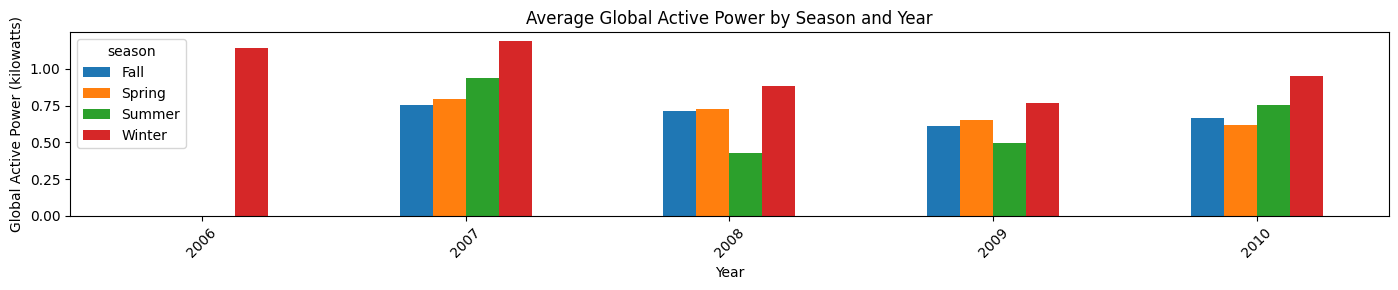

In [114]:
seasonal_data_by_year = df.groupby(['year', 'season',])['Global_active_power'].mean().unstack(level=[1])
print(seasonal_data_by_year)
seasonal_data_by_year.plot(kind='bar', figsize=(14, 3))
plt.title('Average Global Active Power by Season and Year')
plt.xlabel('Year')
plt.ylabel('Global Active Power (kilowatts)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Seasonal Pattern:

Winter: Consistently highest consumption (peaking at ~1.2 kW)

Summer: Second highest consumption

Spring/Fall: Lowest consumption (typically <0.8 kW)

In [128]:
# 3. Yearly trends using plotly,and i want to show sub metering data as well in different bars
import plotly.express as px

def plot_yearly_trends(df):
    yearly_data = df.groupby('year')[[ 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum().reset_index()
    enerergy_consumption = df.groupby('year')['Global_active_power'].sum().reset_index()
    fig = px.bar(yearly_data, x='year', y=[ 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], title='Yearly Trends in Energy Consumption')
    fig.add_bar(x=enerergy_consumption['year'], y=enerergy_consumption['Global_active_power'], name='Total Energy Consumption', marker_color='red')
    fig.update_layout(barmode='group', xaxis_tickangle=-45)
    fig.update_layout(xaxis_title='Year', yaxis_title='Total Energy Consumption (kilowatts)')
    fig.show()

plot_yearly_trends(df)

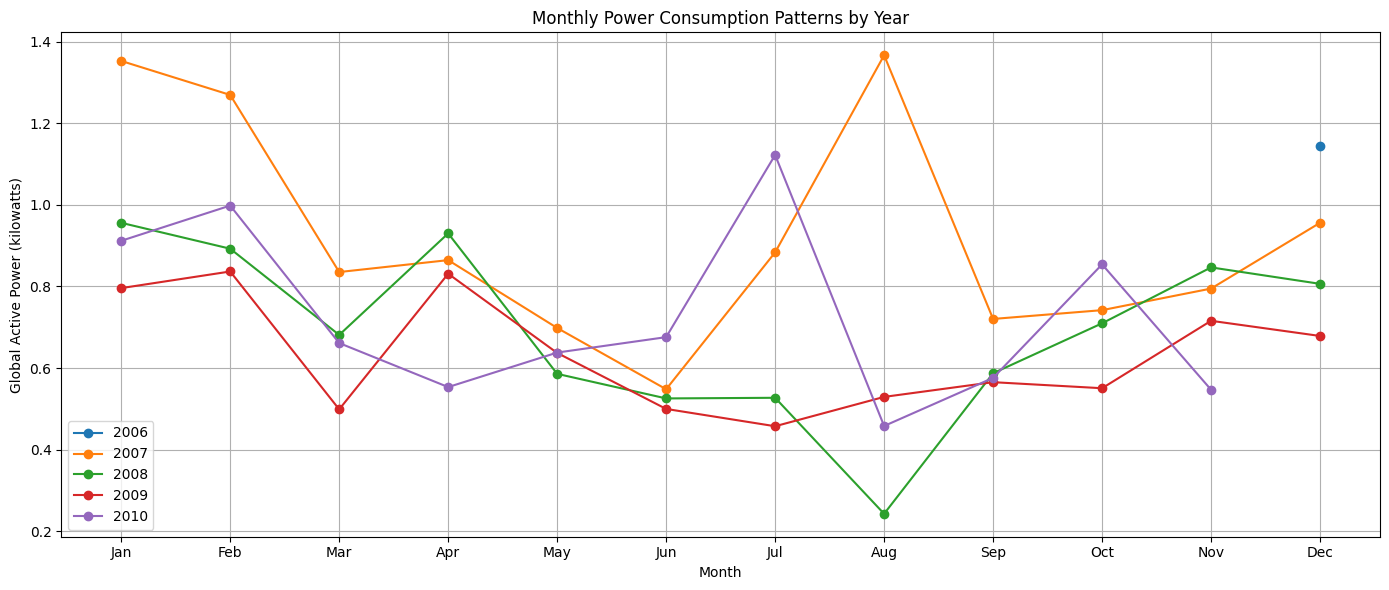

In [122]:
# 4. Monthly patterns across years
import calendar
monthly_data = df.groupby(['year', 'month'])['Global_active_power'].mean().unstack()

plt.figure(figsize=(14, 6))
for year in monthly_data.index:
    plt.plot(monthly_data.columns, monthly_data.loc[year], marker='o', label=str(year))
plt.title('Monthly Power Consumption Patterns by Year')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kilowatts)')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


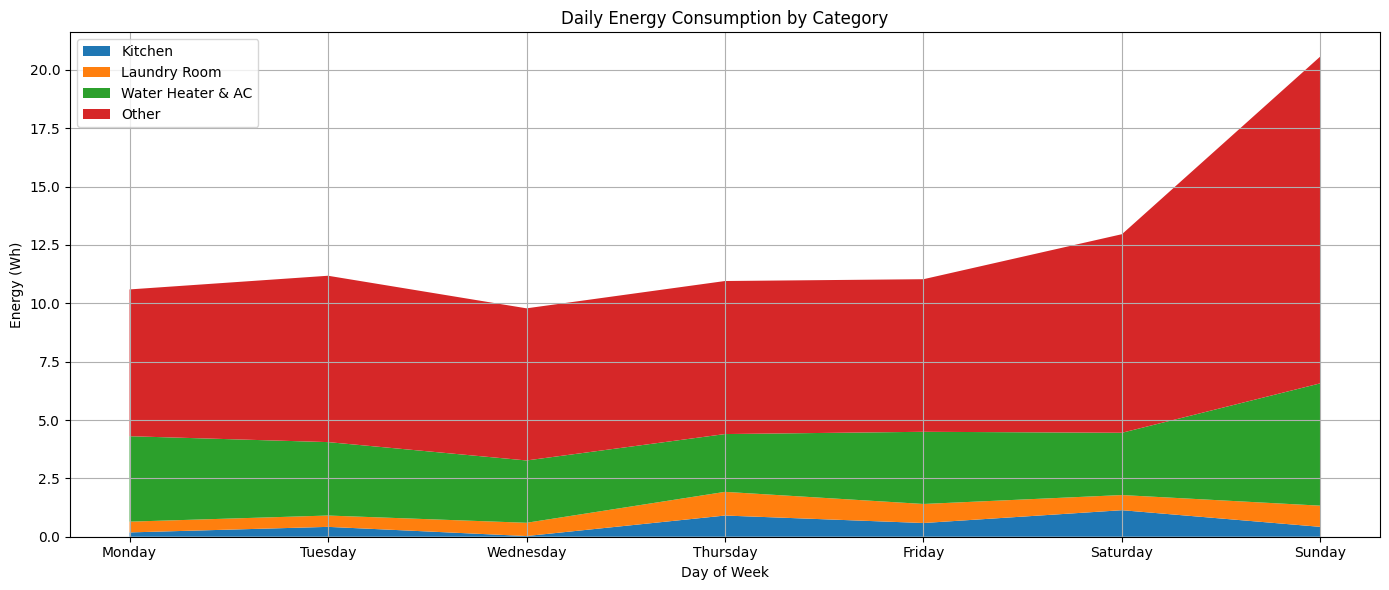

In [67]:
# 6. Sub-metering analysis by day of week
sub_metering_daily = df.groupby('day_of_week')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'other_consumption']].mean()

plt.figure(figsize=(14, 6))
plt.stackplot(sub_metering_daily.index, 
              sub_metering_daily['Sub_metering_1'],
              sub_metering_daily['Sub_metering_2'],
              sub_metering_daily['Sub_metering_3'],
              sub_metering_daily['other_consumption'],
              labels=['Kitchen', 'Laundry Room', 'Water Heater & AC', 'Other'])
plt.title('Daily Energy Consumption by Category')
plt.xlabel('Day of Week')
plt.ylabel('Energy (Wh)')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
# 9. Analyze peak consumption times
peak_times = df.groupby(['year', 'month', 'day'])['Global_active_power'].mean().sort_values(ascending=False).head(20)
print("Top 20 Peak Consumption Times:")
for idx, value in peak_times.items():
    year, month, day = idx
    print(f"{year}-{month:02d}-{day:02d} - {value:.4f} kW")


Top 20 Peak Consumption Times:
2009-01-02 - 5.8060 kW
2007-03-22 - 5.5440 kW
2006-12-24 - 5.3760 kW
2007-02-22 - 4.7860 kW
2007-08-25 - 4.7180 kW
2010-07-15 - 4.6760 kW
2008-12-21 - 4.6720 kW
2007-01-14 - 4.6460 kW
2008-01-13 - 4.3600 kW
2010-07-01 - 4.3500 kW
2007-07-10 - 4.2860 kW
2009-04-28 - 4.1840 kW
2007-07-07 - 4.0940 kW
2007-08-09 - 3.9660 kW
2007-02-18 - 3.9020 kW
2008-02-02 - 3.8460 kW
2007-01-28 - 3.8300 kW
2008-04-11 - 3.7560 kW
2008-11-16 - 3.7180 kW
2010-02-06 - 3.6940 kW



Yearly Energy Consumption Statistics:
      Average (kW)  Std Dev (kW)  Min (kW)  Max (kW)
year                                                
2006      1.144267      1.398249     0.206     5.376
2007      0.918455      0.998335     0.102     5.544
2008      0.689601      0.758205     0.080     4.672
2009      0.631321      0.638035     0.130     5.806
2010      0.728376      0.641512     0.148     4.676

Percentage Change in Average Consumption Year over Year:
2007: -19.73%
2008: -24.92%
2009: -8.45%
2010: 15.37%

Yearly Average Sub-metering Consumption (Wh):
       Kitchen  Laundry Room  Water Heater & AC      Other
year                                                      
2006  0.000000      0.533333           2.400000  16.137778
2007  0.904110      1.194521           4.005479   9.203470
2008  0.349727      0.426230           2.934426   7.782969
2009  0.252055      0.646575           2.863014   6.760365
2010  0.633333      0.524242           3.360606   7.621414


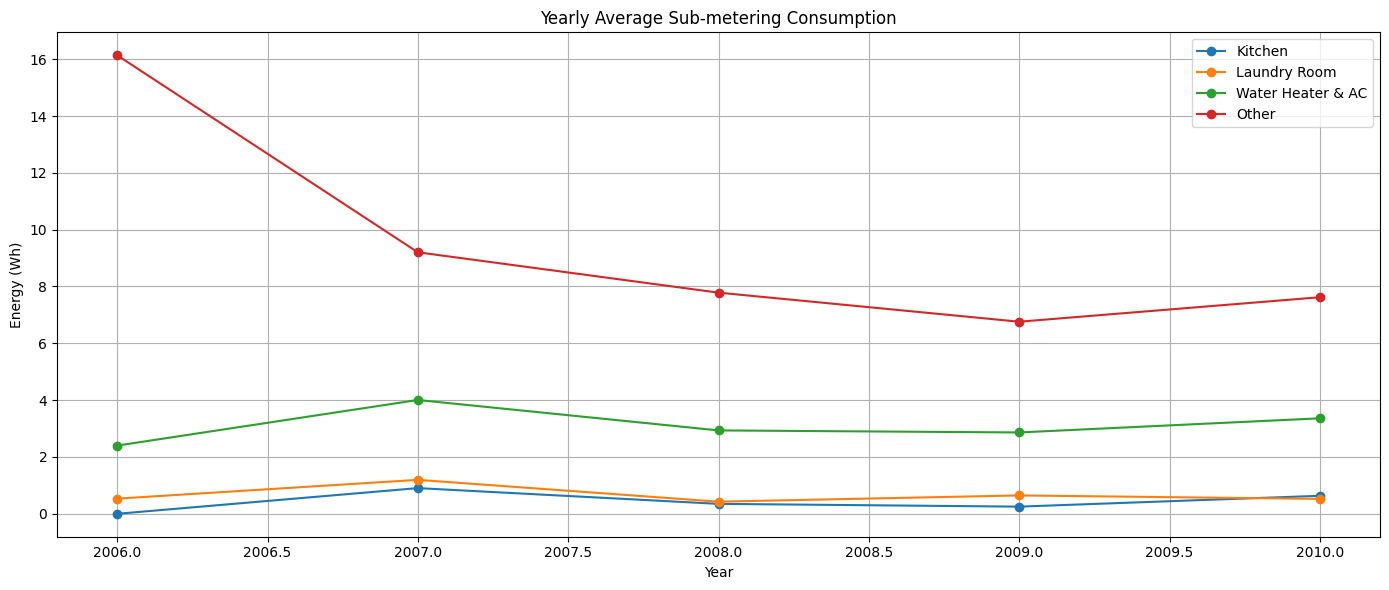

In [70]:
# 10. Calculate energy consumption statistics by year
yearly_stats = df.groupby('year')['Global_active_power'].agg(['mean', 'std', 'min', 'max'])
yearly_stats.columns = ['Average (kW)', 'Std Dev (kW)', 'Min (kW)', 'Max (kW)']
print("\nYearly Energy Consumption Statistics:")
print(yearly_stats)

# 11. Calculate percentage change in consumption year over year
yearly_avg = df.groupby('year')['Global_active_power'].mean()
yearly_pct_change = yearly_avg.pct_change() * 100
print("\nPercentage Change in Average Consumption Year over Year:")
for year, pct in yearly_pct_change.items():
    if not np.isnan(pct):
        print(f"{year}: {pct:.2f}%")

# 12. Analyze sub-metering usage patterns
sub_metering_yearly = df.groupby('year')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'other_consumption']].mean()
sub_metering_yearly.columns = ['Kitchen', 'Laundry Room', 'Water Heater & AC', 'Other']
print("\nYearly Average Sub-metering Consumption (Wh):")
print(sub_metering_yearly)

# Plot sub-metering trends by year
plt.figure(figsize=(14, 6))
for column in sub_metering_yearly.columns:
    plt.plot(sub_metering_yearly.index, sub_metering_yearly[column], marker='o', label=column)
plt.title('Yearly Average Sub-metering Consumption')
plt.xlabel('Year')
plt.ylabel('Energy (Wh)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


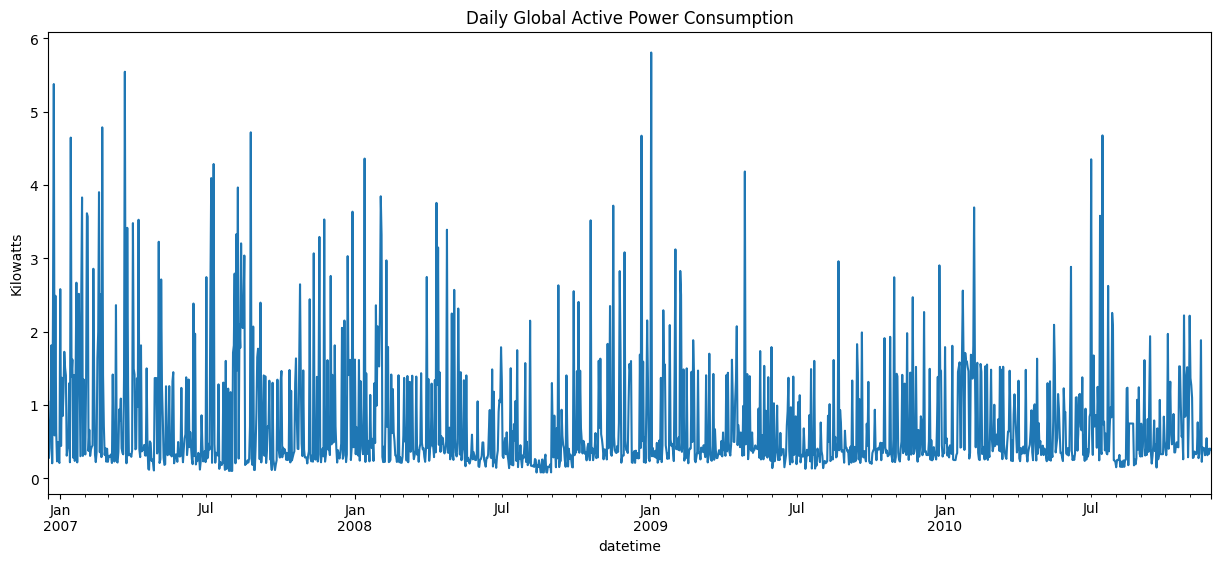

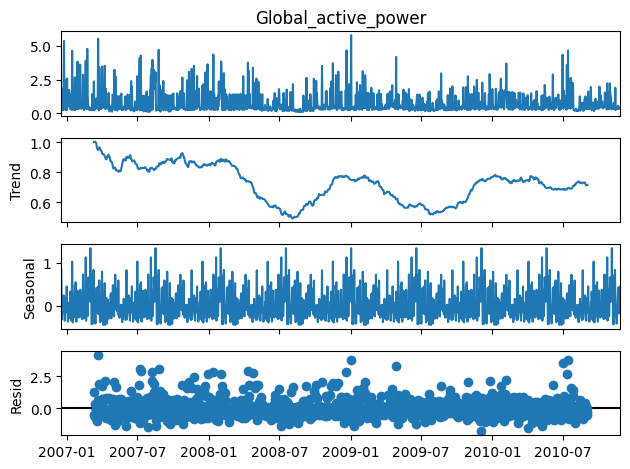

In [71]:
# Plot power consumption

from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(15,6))
df['Global_active_power'].plot(title='Daily Global Active Power Consumption')
plt.ylabel('Kilowatts')
plt.show()

# Time series decomposition
result = seasonal_decompose(df['Global_active_power'], model='additive', period=24*7)
result.plot()
plt.show()

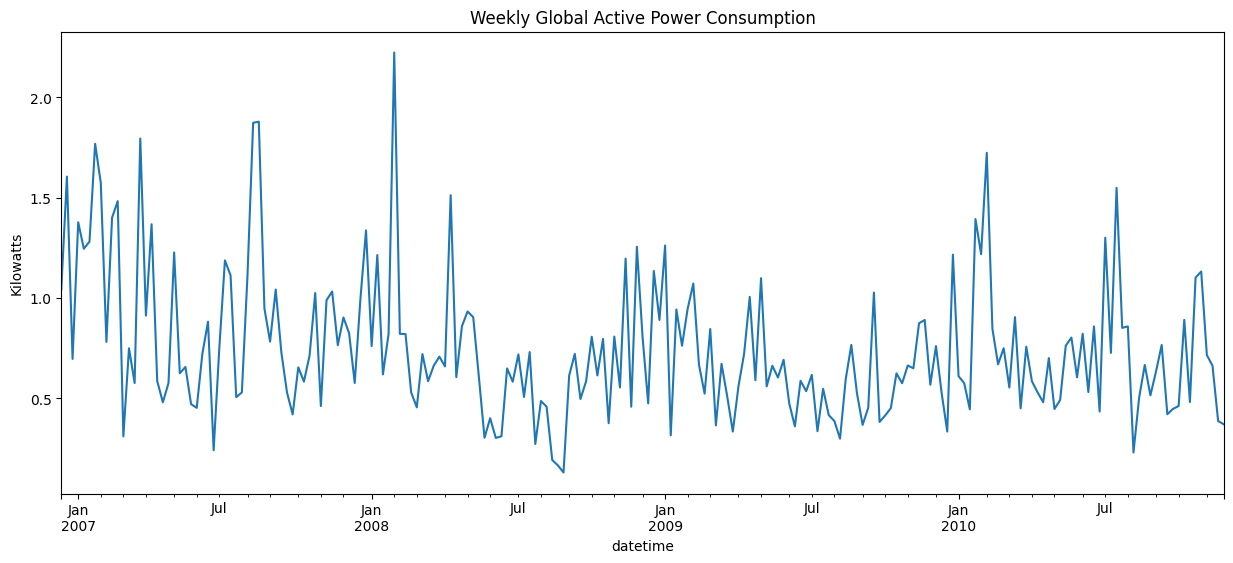

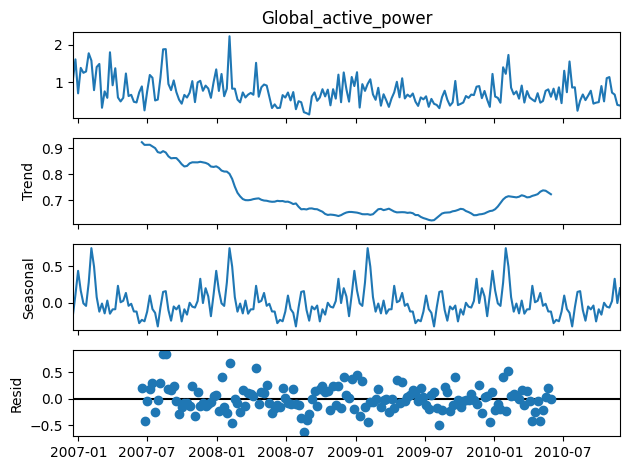

In [74]:
# Resample to weekly frequency using only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
weekly_df = df[numeric_cols].resample('W').mean()

# Plot power consumption
plt.figure(figsize=(15,6))
weekly_df['Global_active_power'].plot(title='Weekly Global Active Power Consumption')
plt.ylabel('Kilowatts')
plt.show()

# Plot decomposition
# Use a smaller period that fits within the available data
result = seasonal_decompose(weekly_df['Global_active_power'], model='additive', period=52)  # Weekly data, period set to 52 weeks (1 year)
result.plot()
plt.show()

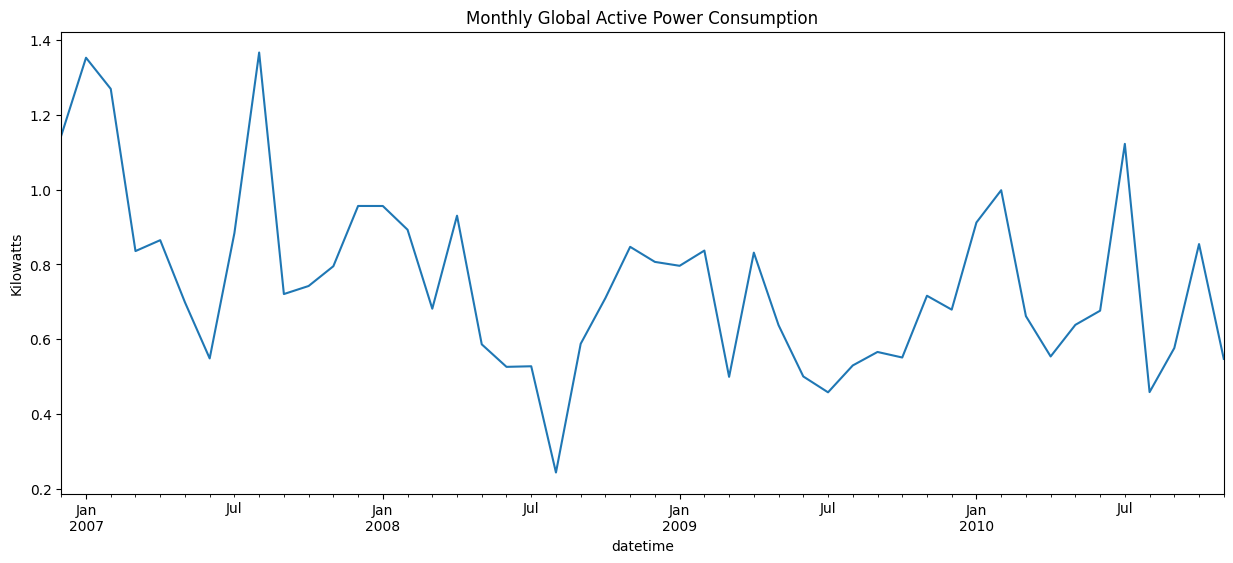

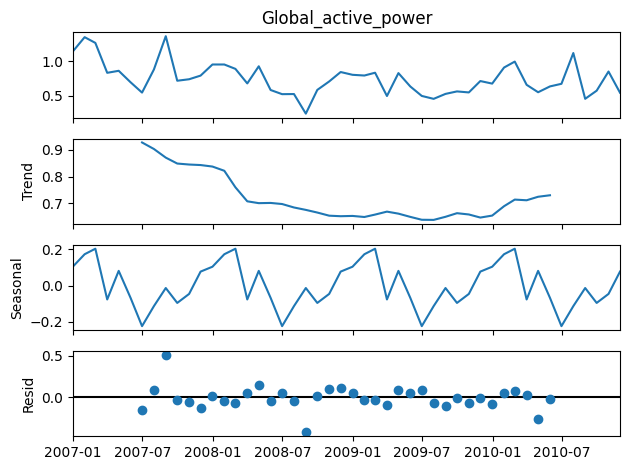

In [77]:
#resample to monthly frequency
monthly_df = df[numeric_cols].resample('M').mean()

# Plot power consumption
plt.figure(figsize=(15,6))
monthly_df['Global_active_power'].plot(title='Monthly Global Active Power Consumption')
plt.ylabel('Kilowatts')
plt.show()
#plot decomposition
result = seasonal_decompose(monthly_df['Global_active_power'], model='additive', period=12)  # Monthly data, period set to 12 months
result.plot()
plt.show()

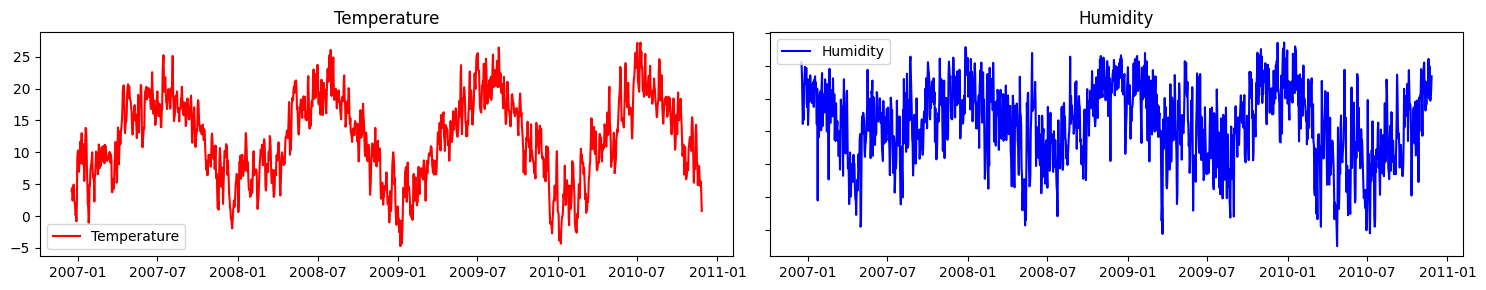

In [78]:
# Environmental factors over time (Temperature and Humidity)
def plot_environmental_factors(df):
    fig, axs = plt.subplots(1, 2, figsize=(15, 3))
    axs[0].plot(df.index, df['temp'], label='Temperature', color='red')
    axs[0].set_title('Temperature')
    axs[1].plot(df.index, df['humidity'], label='Humidity', color='blue')
    axs[1].set_title('Humidity')

    for ax in axs.flat:
        ax.label_outer()
        ax.legend()

    plt.tight_layout()
    plt.show()
    
plot_environmental_factors(df)

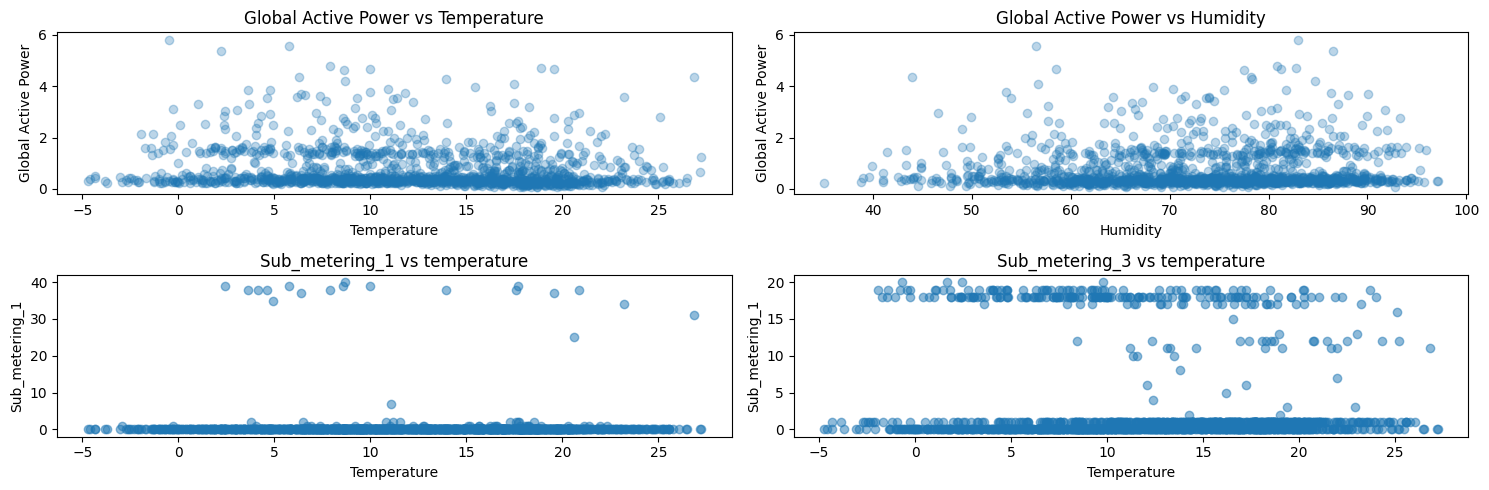

In [79]:
# Check how does the Global Active Power change with respect to the environmental factors
def plot_global_active_power_vs_environment(df):
    fig, axs = plt.subplots(2, 2, figsize=(15, 5))
    axs[0,0].scatter(df['temp'], df['Global_active_power'], alpha=0.3)
    axs[0,0].set_title('Global Active Power vs Temperature')
    axs[0,0].set_xlabel('Temperature')
    axs[0,0].set_ylabel('Global Active Power')

    axs[0,1].scatter(df['humidity'], df['Global_active_power'], alpha=0.3)
    axs[0,1].set_title('Global Active Power vs Humidity')
    axs[0,1].set_xlabel('Humidity')
    axs[0,1].set_ylabel('Global Active Power')
    
    axs[1,0].scatter(df['temp'], df['Sub_metering_1'], alpha=0.5)
    axs[1,0].set_title('Sub_metering_1 vs temperature')
    axs[1,0].set_xlabel('Temperature')
    axs[1,0].set_ylabel('Sub_metering_1')
    
    axs[1,1].scatter(df['temp'], df['Sub_metering_3'], alpha=0.5)
    axs[1,1].set_title('Sub_metering_3 vs temperature')
    axs[1,1].set_xlabel('Temperature')
    axs[1,1].set_ylabel('Sub_metering_1')

    plt.tight_layout()  
    plt.show()

plot_global_active_power_vs_environment(df)

In [131]:
# Visualize the energy consumption over time
def energy_consumption_over_time(df):
    for column in ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3','temp', 'humidity', 'Voltage', 'Global_reactive_power']:
        fig = px.line(df, x=df.index, y=column, 
                      title=f'{column} Over Time')
        fig.update_layout(xaxis_title='Date', 
                          yaxis_title=f'{column} (kilowatts)',
                          template='plotly_white')
        fig.show()
energy_consumption_over_time(df)

In [133]:
df=df.dropna()
# check stationarity of the time series
from statsmodels.tsa.stattools import adfuller
def check_stationarity(series):
    result = adfuller(series)
    print(f'Checking stationarity for {series.name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")
    print(20* '-')

check_stationarity(df['Global_active_power'])
check_stationarity(df['Sub_metering_1'])
check_stationarity(df['Sub_metering_2'])
check_stationarity(df['Sub_metering_3'])

Checking stationarity for Global_active_power:
ADF Statistic: -5.945747483996948
p-value: 2.2064047114216192e-07
The series is stationary.
--------------------
Checking stationarity for Sub_metering_1:
ADF Statistic: -38.31849744041509
p-value: 0.0
The series is stationary.
--------------------
Checking stationarity for Sub_metering_2:
ADF Statistic: -6.833579294333885
p-value: 1.866881415041853e-09
The series is stationary.
--------------------
Checking stationarity for Sub_metering_3:
ADF Statistic: -12.243692593387868
p-value: 9.893261078771211e-23
The series is stationary.
--------------------


C:\Users\bhusa\AppData\Local\Temp\ipykernel_45572\411254324.py:12: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_clean.interpolate(method='time', inplace=True)


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
temp                     0
humidity                 0
conditions               0
dtype: int64
Global_active_power: 104 outliers
Global_reactive_power: 15 outliers
Voltage: 51 outliers
Global_intensity: 99 outliers
Sub_metering_1: 62 outliers
Sub_metering_2: 21 outliers
Sub_metering_3: 252 outliers
temp: 0 outliers
humidity: 3 outliers


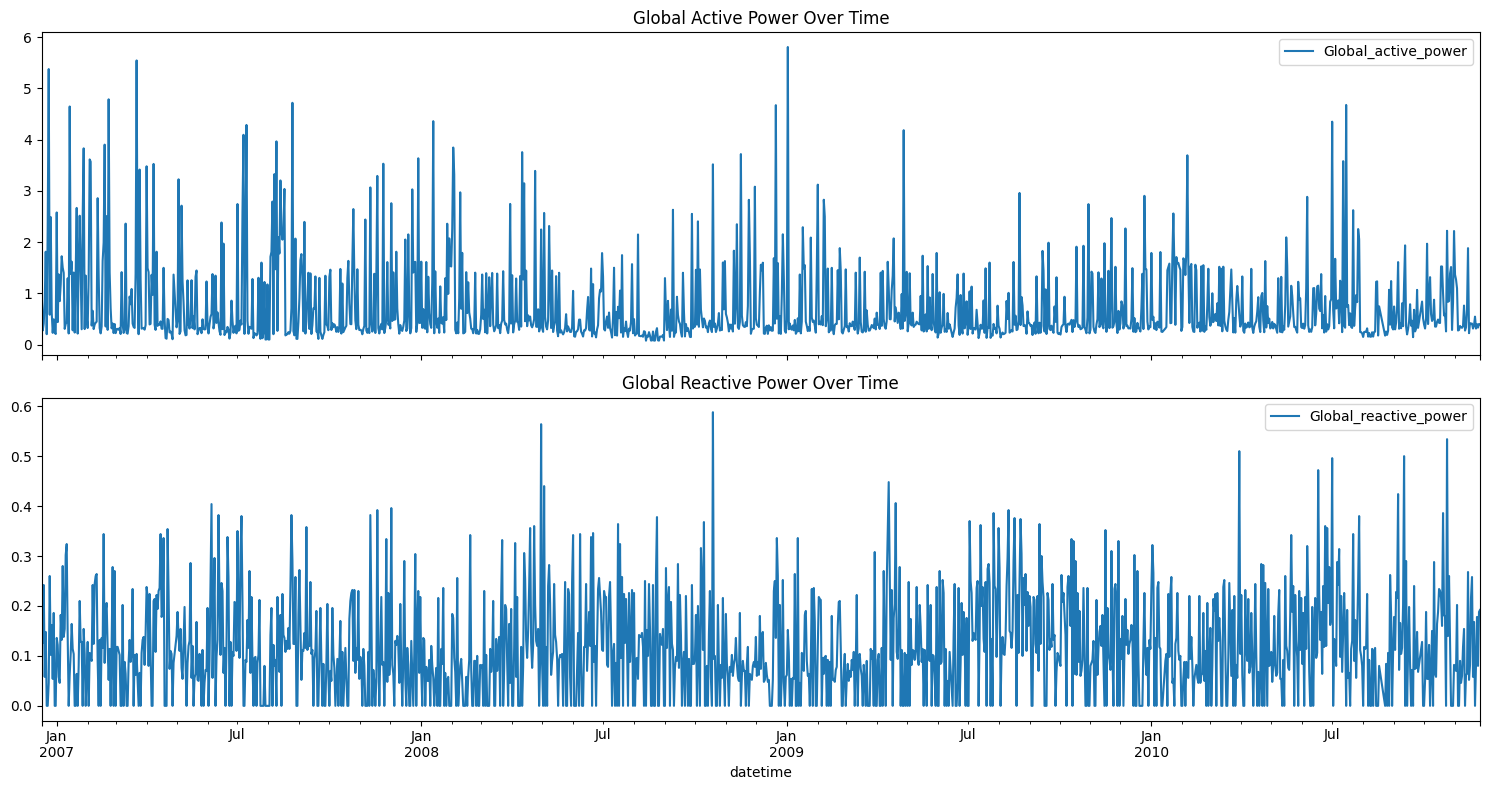

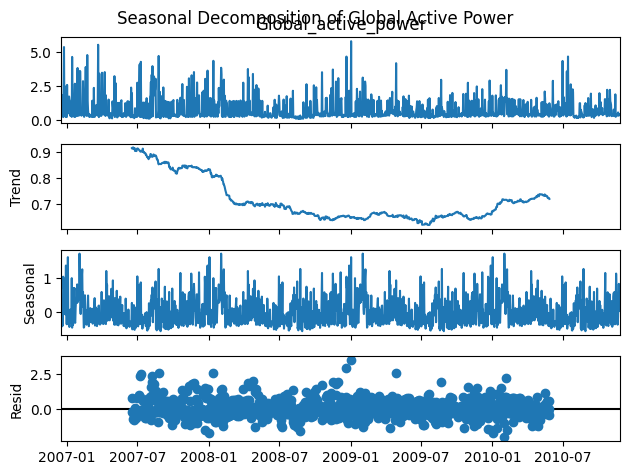

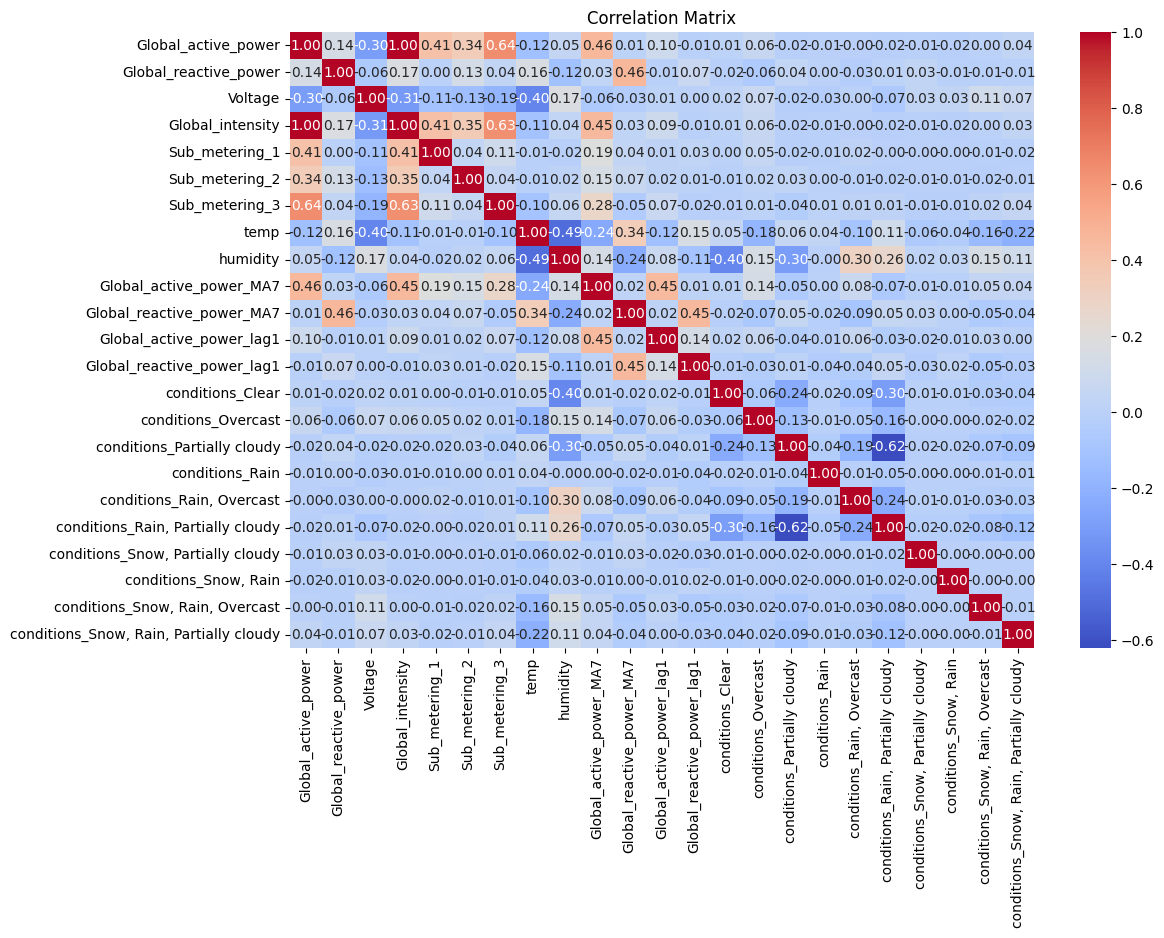

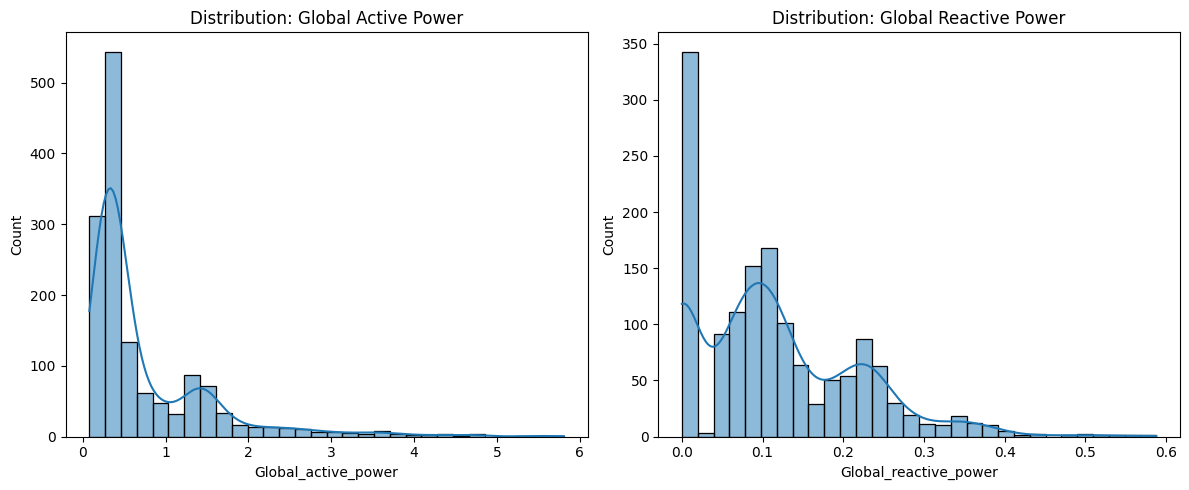

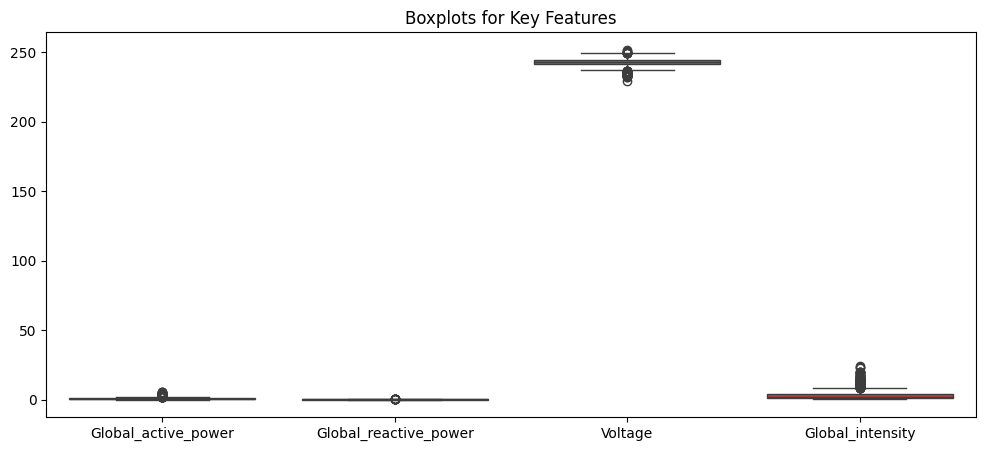

Naive Baseline: {'RMSE': 1.0636264532180097, 'MAE': 0.6496917712691771, 'MAPE': 123.4695757496824}
Naive Baseline y2: {'RMSE': 1.0176151552981987, 'MAE': 0.6375418410041841, 'MAPE': inf}
Moving Average (7-day) Baseline: {'RMSE': 0.8096209081389739, 'MAE': 0.5526210400478182, 'MAPE': 110.41213210678309}
Moving Avera)ge (7-day) Baseline y2: {'RMSE': 0.7340113617379911, 'MAE': 0.6316295078700936, 'MAPE': inf}


In [6]:
import pandas as pd
import numpy as np


# 1.1 Import the dataset
df = pd.read_csv('data/power_consumption_data.csv')
# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])
# Set datetime as index for interpolation
df_clean = df.set_index('datetime')
# Interpolate missing numeric values (linear interpolation is default)
df_clean.interpolate(method='time', inplace=True)
# After interpolation, check for remaining missing values
print(df_clean.isnull().sum())
# Reset index for further processing
df_clean = df_clean.reset_index()

def detect_outliers(df, columns):
    outlier_indices = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        print(f"{col}: {len(outlier_indices[col])} outliers")
    return outlier_indices

numeric_cols = [
    'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'temp', 'humidity'
]

outlier_indices = detect_outliers(df_clean, numeric_cols)

# For daily data, 7-day rolling mean
df_clean['Global_active_power_MA7'] = df_clean['Global_active_power'].rolling(window=7).mean()
df_clean['Global_reactive_power_MA7'] = df_clean['Global_reactive_power'].rolling(window=7).mean()

df_clean['Global_active_power_lag1'] = df_clean['Global_active_power'].shift(1)
df_clean['Global_reactive_power_lag1'] = df_clean['Global_reactive_power'].shift(1)

df_clean = pd.get_dummies(df_clean, columns=['conditions'])

import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Time Series Plots: Trends and Seasonality ---
fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
df_clean.plot(x='datetime', y='Global_active_power', ax=axes[0], title='Global Active Power Over Time')
df_clean.plot(x='datetime', y='Global_reactive_power', ax=axes[1], title='Global Reactive Power Over Time')
plt.tight_layout()
plt.show()

# --- 2. Seasonal Decomposition (Optional, for trend/seasonality) ---
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_clean.set_index('datetime')['Global_active_power'], model='additive', period=365)
decomp.plot()
plt.suptitle('Seasonal Decomposition of Global Active Power')
plt.show()

# --- 3. Correlation Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# --- 4. Distribution Plots for Targets ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_clean['Global_active_power'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution: Global Active Power')
sns.histplot(df_clean['Global_reactive_power'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution: Global Reactive Power')
plt.tight_layout()
plt.show()

# --- 5. Boxplots for Outliers ---
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_clean[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])
plt.title('Boxplots for Key Features')
plt.show()

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error


target = 'Global_active_power'
target2='Global_reactive_power'

# Naive Forecast: Predict next value as last observed
df_clean['naive_pred'] = df_clean[target].shift(1)
df_clean['naive_pred2']=df_clean[target].shift(1)

# Moving Average Forecast (window=7)
window = 7
df_clean['ma7_pred'] = df_clean[target].rolling(window=window).mean().shift(1)
df_clean['ma7_pred2']=df_clean[target].rolling(window=window).mean().shift(1)

# Drop rows with NaNs (due to lag/rolling)
eval_df = df_clean.dropna(subset=['naive_pred', 'ma7_pred','naive_pred2','ma7_pred2'])


def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Evaluate Naive
naive_metrics = evaluate(eval_df[target], eval_df['naive_pred'])
print("Naive Baseline:", naive_metrics)
naive_metrics2 = evaluate(eval_df[target2], eval_df['naive_pred2'])
print("Naive Baseline y2:", naive_metrics2)

# Evaluate Moving Average
ma7_metrics = evaluate(eval_df[target], eval_df['ma7_pred'])
print("Moving Average (7-day) Baseline:", ma7_metrics)
ma7_metrics2 = evaluate(eval_df[target2], eval_df['ma7_pred2'])
print("Moving Avera)ge (7-day) Baseline y2:", ma7_metrics2)

All four time series (Global_active_power, Sub_metering_1, Sub_metering_2, and Sub_metering_3) have very low ADF statistics and extremely small p-values (close to zero).

This means that all the series are stationary, so their statistical properties (like mean and variance) do not shift over time.

The ADF statistic is a measure of stationarity: lower values (more negative) typically indicate stronger evidence of stationarity.

The p-value tells us whether we reject the null hypothesis (which assumes the series is non-stationary). If the p-value is below a common threshold (0.05 or 0.01), we reject the null hypothesis, meaning the series is stationary.